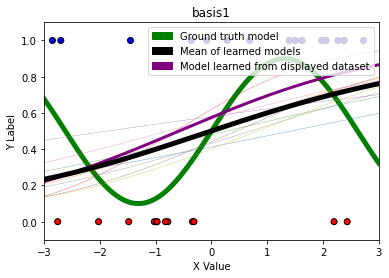

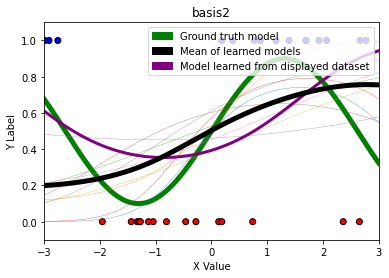

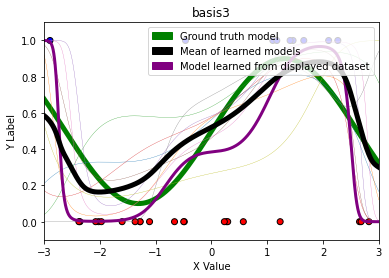

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import matplotlib.patches as mpatches
from scipy.special import expit as sigmoid

# This script requires the above packages to be installed.
# Please implement the basis2, basis3, fit, and predict methods.
# Then, create the three plots. An example has been included below, although
# the models will look funny until fit() and predict() are implemented!

# You can add additional private methods by beginning them with two
# underscores. It may look like the __dummyPrivateMethod below. You can feel
# free to change any of the class attributes, as long as you do not change any
# of the given function headers (they must take and return the same arguments).

# Note: this is in Python 3

def basis1(x):
    return np.stack([np.ones(len(x)), x], axis=1)

def basis2(x):
    return np.stack([np.ones(len(x)), x, np.power(x, 2)], axis=1)

def basis3(x):
    return np.stack([np.ones(len(x)), *[np.power(x, i) for i in range(1,6)]], axis=1)

class LogisticRegressor:
    def __init__(self, eta, runs):
        # Your code here: initialize other variables here
        self.eta = eta
        self.runs = runs

    # Optimize w using gradient descent
    def fit(self, x, y, w_init=None):
        # Keep this if case for the autograder
        if w_init is not None:
            self.W = w_init
        else:
            self.W = np.random.rand(x.shape[1], 1)
        
        N = len(x)
        for _ in range(0, self.runs):
            self.W = self.W - self.eta * np.dot(x.T, (self.predict(x) - y)) / N

    # Fix this method!
    def predict(self, x):
        return 1 / (1 + np.exp(-1 * np.dot(x, self.W)))

# Function to visualize prediction lines
# Takes as input last_x, last_y, [list of models], basis function, title
# last_x and last_y should specifically be the dataset that the last model
# in [list of models] was trained on
def visualize_prediction_lines(last_x, last_y, models, basis, title):
    # Plot setup
    green = mpatches.Patch(color='green', label='Ground truth model')
    black = mpatches.Patch(color='black', label='Mean of learned models')
    purple = mpatches.Patch(color='purple', label='Model learned from displayed dataset')
    plt.legend(handles=[green, black, purple], loc='upper right')
    plt.title(title)
    plt.xlabel('X Value')
    plt.ylabel('Y Label')
    plt.axis([-3, 3, -.1, 1.1]) # Plot ranges

    # Plot dataset that last model in models (models[-1]) was trained on
    cmap = c.ListedColormap(['r', 'b'])
    plt.scatter(last_x, last_y, c=last_y, cmap=cmap, linewidths=1, edgecolors='black')

    # Plot models
    X_pred = np.linspace(-3, 3, 1000)
    X_pred_transformed = basis(X_pred)

    ## Ground truth model
    plt.plot(X_pred, np.sin(1.2*X_pred) * 0.4 + 0.5, 'g', linewidth=5)

    ## Individual learned logistic regressor models
    Y_hats = []
    for i in range(len(models)):
        model = models[i]
        Y_hat = model.predict(X_pred_transformed)
        Y_hats.append(Y_hat)
        if i < len(models) - 1:
            plt.plot(X_pred, Y_hat, linewidth=.3)
        else:
            plt.plot(X_pred, Y_hat, 'purple', linewidth=3)

    # Mean / expectation of learned models over all datasets
    plt.plot(X_pred, np.mean(Y_hats, axis=0), 'k', linewidth=5)

    plt.savefig(title + '.png')
    plt.show()

# Function to generate datasets from underlying distribution
def generate_data(dataset_size):
    x, y = [], []
    for _ in range(dataset_size):
        x_i = 6 * np.random.random() - 3
        p_i = np.sin(1.2*x_i) * 0.4 + 0.5
        y_i = np.random.binomial(1, p_i)
        x.append(x_i)
        y.append(y_i)
    return np.array(x), np.array(y).reshape(-1, 1)

if __name__ == "__main__":
    
    # DO NOT CHANGE THE SEED!
    np.random.seed(1738)
    eta = 0.001
    runs = 10000
    N = 30

    # Plot each basis with all 10 models on each plot
    for b, t in [(basis1, "basis1"), (basis2, "basis2"), (basis3, "basis3")]:
        all_models = []
        for _ in range(10):
            x, y = generate_data(N)
            x_transformed = b(x)
            model = LogisticRegressor(eta=eta, runs=runs)
            model.fit(x_transformed, y)
            all_models.append(model)
        # Here x and y contain last dataset:
        visualize_prediction_lines(x, y, all_models, b, t)
